<a href="https://colab.research.google.com/github/ekiyam/datamining/blob/main/flight_ticket_price_analysis_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flight Ticket Price Analysis & Prediction

## Importing All Dependencies & Dataset

In [ ]:
import pandas as pd
import joblib
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split, cross_val_score,KFold,RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.pipeline import Pipeline
print("All dependencies are imported.")

All dependencies are imported.


In [ ]:
train=pd.read_excel('/content/Data_Train.xlsx')
print("Training Dataset:")
display(train)

Training Dataset:


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Data Analysis & Preprocessing

In [ ]:
print("Train DF information:")
display(train.info())

Train DF information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


None

In [ ]:
print("Null counts:")
display(train.isnull().sum())

Null counts:


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
print("Train dataset description:")
print("Numerical columns:")
display(train.describe())
print()
print("Categorical columns:")
display(train.describe(include="object"))

Train dataset description:
Numerical columns:


,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000



Categorical columns:


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [ ]:
profile=ProfileReport(train)
display(profile)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
train['Date']=pd.to_numeric(train['Date_of_Journey'].str.split('/').str[0])
train['Month']=pd.to_numeric(train['Date_of_Journey'].str.split('/').str[1])
train['Year']=pd.to_numeric(train['Date_of_Journey'].str.split('/').str[2])
print("Separating date, month & year from date column:")
display(train[['Date','Month','Year']])

Separating date, month & year from date column:


,Date,Month,Year
0,24,3,2019
1,1,5,2019
2,9,6,2019
3,12,5,2019
4,1,3,2019
...,...,...,...
10678,9,4,2019
10679,27,4,2019
10680,27,4,2019
10681,1,3,2019


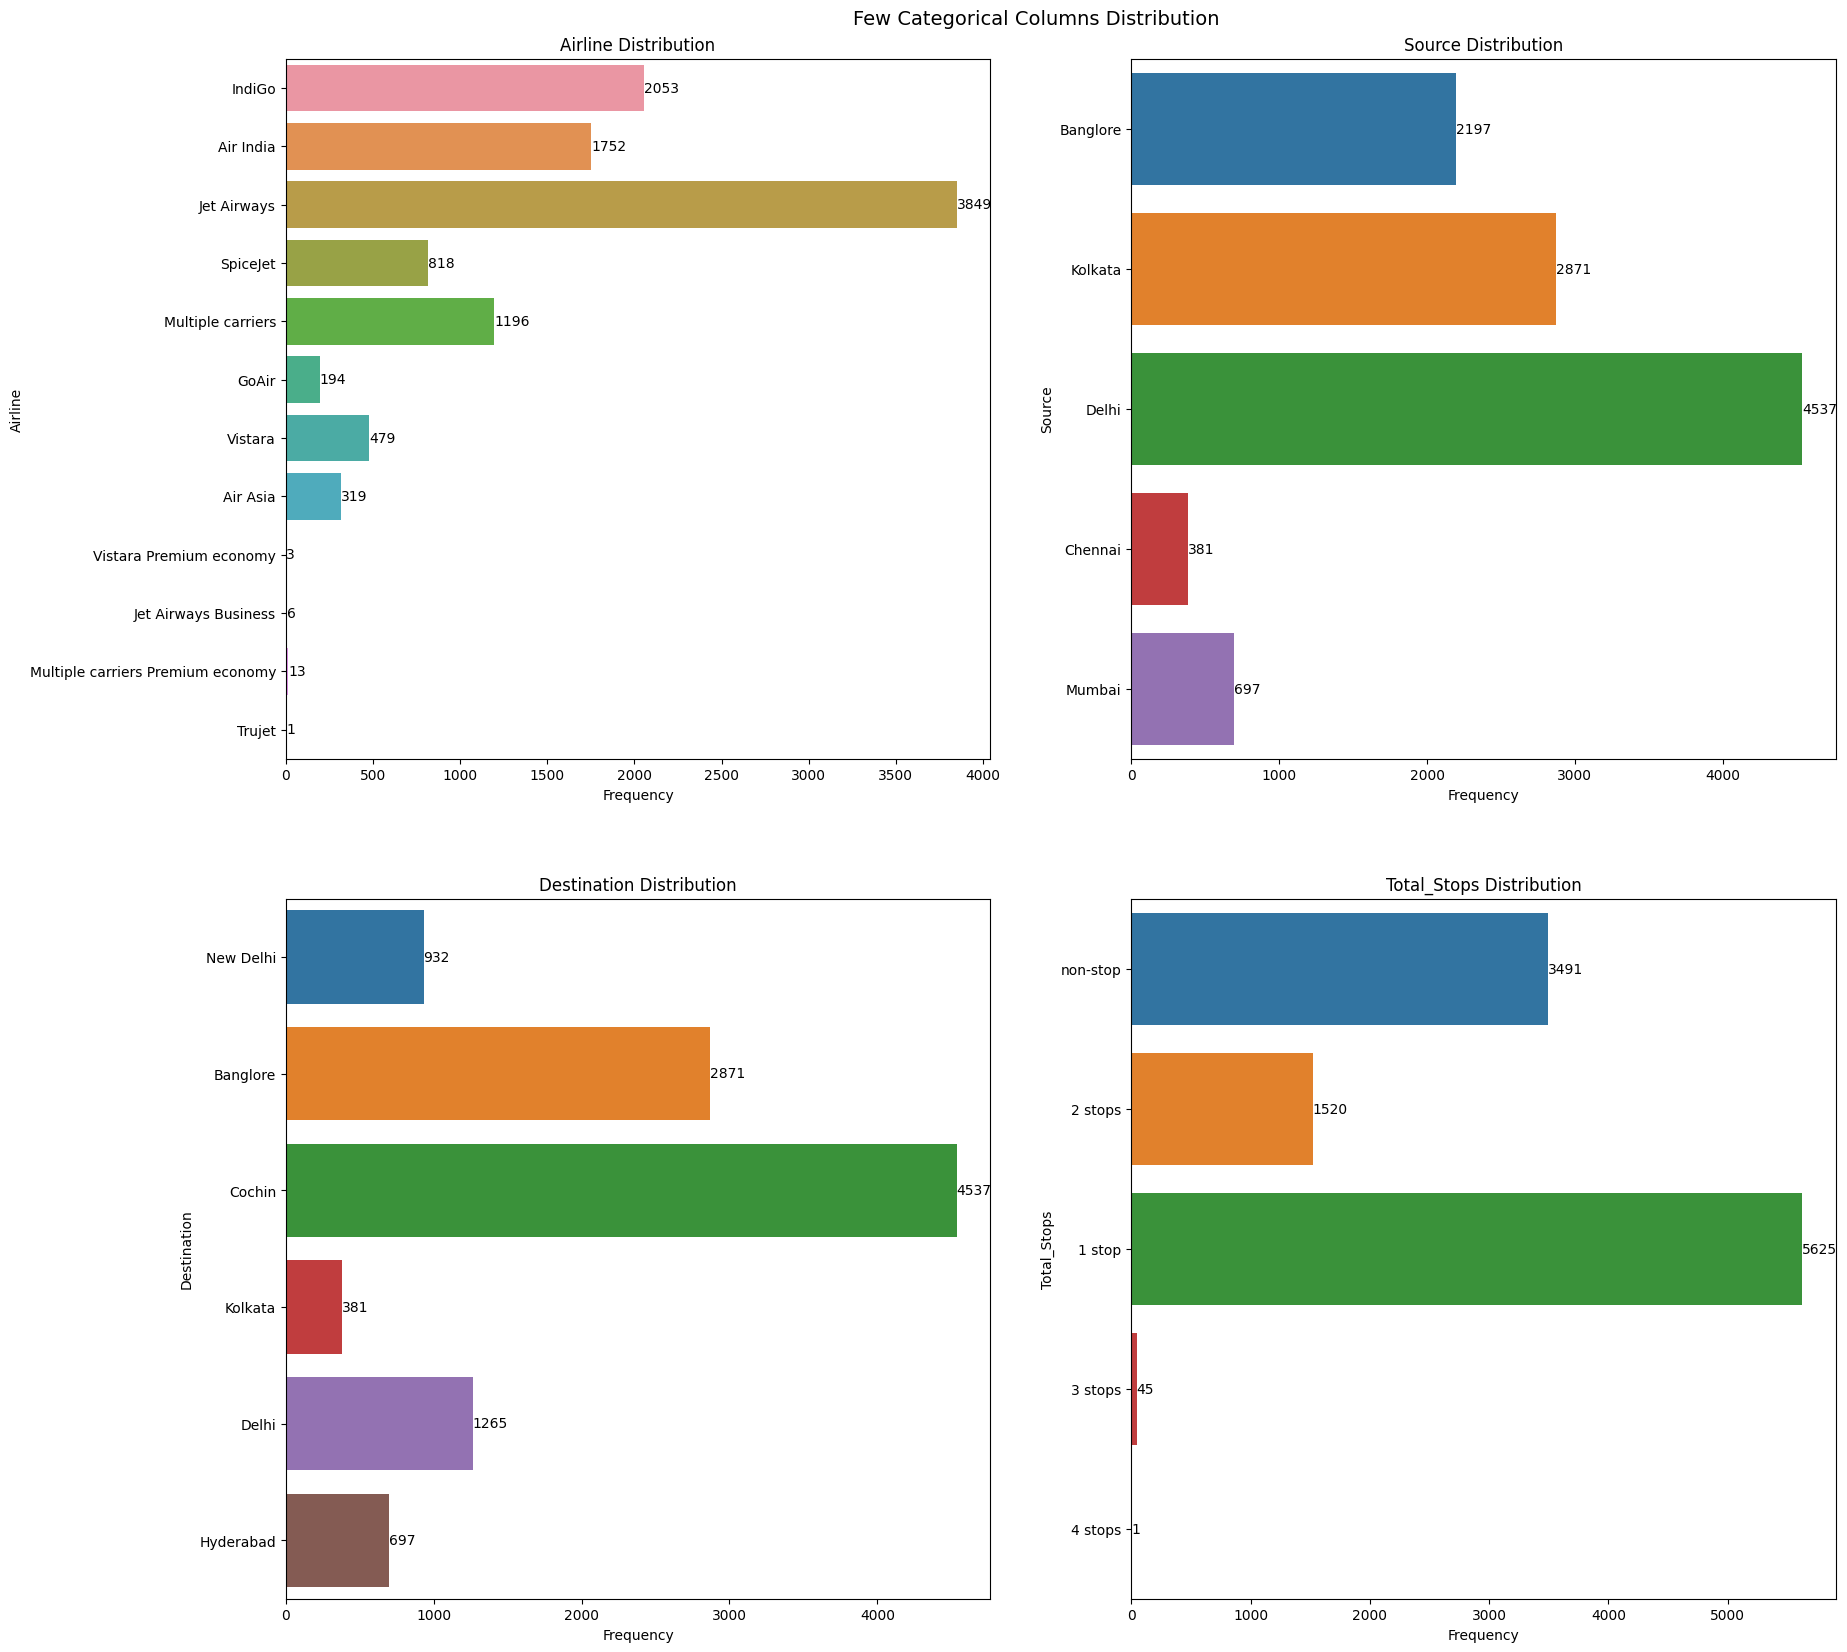

In [ ]:
cols=["Airline","Source","Destination","Total_Stops"]
fig,axes=plt.subplots(2,2,figsize=(20,20))
for i, col in enumerate(cols):
    sns.countplot(y=col, data=train, ax=axes[i//2,i%2])
    for container in axes[i//2,i%2].containers:
        axes[i//2,i%2].bar_label(container,label_type="edge")
    axes[i//2,i%2].set_ylabel(f"{col}")
    axes[i//2,i%2].set_xlabel("Frequency")
    axes[i//2,i%2].set_title(f"{col} Distribution")
fig.text(0.5,.9,"Few Categorical Columns Distribution", va="center", ha="center", fontsize=14)
plt.show()

In [ ]:
print("Dropping null values:")
train=train.dropna()
display(train.isnull().sum())

Dropping null values:


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
dtype: int64

In [ ]:
cols_to_drop=["Date_of_Journey","Route","Additional_Info"]
print(f"Dropping columns: {cols_to_drop}:")
train.drop(columns=cols_to_drop, axis=1, inplace=True)
display(train)

Dropping columns: ['Date_of_Journey', 'Route', 'Additional_Info']:


,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107,9,4,2019
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,non-stop,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648,1,3,2019


In [ ]:
train['Dep_Time_hr']=pd.to_numeric(train['Dep_Time'].str.split(':').str[0])
train['Dep_Time_min']=pd.to_numeric(train['Dep_Time'].str.split(':').str[1])
print("Separating hours and minutes in departure time:")
display(train[['Dep_Time_hr','Dep_Time_min']])

Separating hours and minutes in departure time:


,Dep_Time_hr,Dep_Time_min
0,22,20
1,5,50
2,9,25
3,18,5
4,16,50
...,...,...
10678,19,55
10679,20,45
10680,8,20
10681,11,30


In [ ]:
train['Arrival_Time_hr']=pd.to_numeric(train['Arrival_Time'].str.split(':').str[0])
train['Arrival_Time_min']=train['Arrival_Time'].str.split(':').str[1]
train['Arrival_Time_min']=train['Arrival_Time_min'].str.split().str[0]
print("Separating hours and minutes in arrival time:")
display(train[['Arrival_Time_hr','Arrival_Time_min']])

Separating hours and minutes in arrival time:


,Arrival_Time_hr,Arrival_Time_min
0,1,10
1,13,15
2,4,25
3,23,30
4,21,35
...,...,...
10678,22,25
10679,23,20
10680,11,20
10681,14,10


In [ ]:
train['Duration_hr']=train['Duration'].str.split().str[0].str.split('h').str[0]
print("Converting duration time to hours:")
display(train["Duration_hr"])
print()
print("Checking the rows where the duration is 5 minutes:")
display(train[train['Duration_hr']=='5m'])

Converting duration time to hours:


0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_hr, Length: 10682, dtype: object


Checking the rows where the duration is 5 minutes:


,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date,Month,Year,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hr
6474,Air India,Mumbai,Hyderabad,16:50,16:55,5m,2 stops,17327,6,3,2019,16,50,16,55,5m


In [ ]:
train=train[train['Duration_hr']!='5m']
print("Removing the row with duration of 5 minutes:")
display(train["Duration_hr"])

Removing the row with duration of 5 minutes:


0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_hr, Length: 10681, dtype: object

In [ ]:
train['Duration_hr']=pd.to_numeric(train['Duration_hr'])
print("Converting Duration Hourse to Numeric:")
display(train["Duration_hr"])

Converting Duration Hourse to Numeric:


0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_hr, Length: 10681, dtype: int64

In [ ]:
train['Duration_min']=train['Duration'].str.split().str[1].str.split('m').str[0]
train['Duration_min'].fillna(0,inplace=True)
train["Duration_min"]=pd.to_numeric(train["Duration_min"])
print("Separating minutes from the Duration:")
display(train['Duration_min'])

Separating minutes from the Duration:


0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration_min, Length: 10681, dtype: int64

In [ ]:
train['Arrival_Time_hr']=pd.to_numeric(train['Arrival_Time'].str.split(':').str[0])
train['Arrival_Time_min']=train['Arrival_Time'].str.split(':').str[1]
train['Arrival_Time_min']=train['Arrival_Time_min'].str.split().str[0]
train["Arrival_Time_min"]=pd.to_numeric(train["Arrival_Time_min"])
print("Separating hours from Arrival Time and converting into numeric:")
display(train['Arrival_Time_min'])

Separating hours from Arrival Time and converting into numeric:


0        10
1        15
2        25
3        30
4        35
         ..
10678    25
10679    20
10680    20
10681    10
10682    15
Name: Arrival_Time_min, Length: 10681, dtype: int64

In [ ]:
cols_to_drop=['Dep_Time','Arrival_Time','Duration']
print(f"Dropping the columns: {cols_to_drop}.")
train.drop(columns=cols_to_drop,axis=1,inplace=True)
display(train)

Dropping the columns: ['Dep_Time', 'Arrival_Time', 'Duration'].


,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,2019,11,30,14,10,2,40


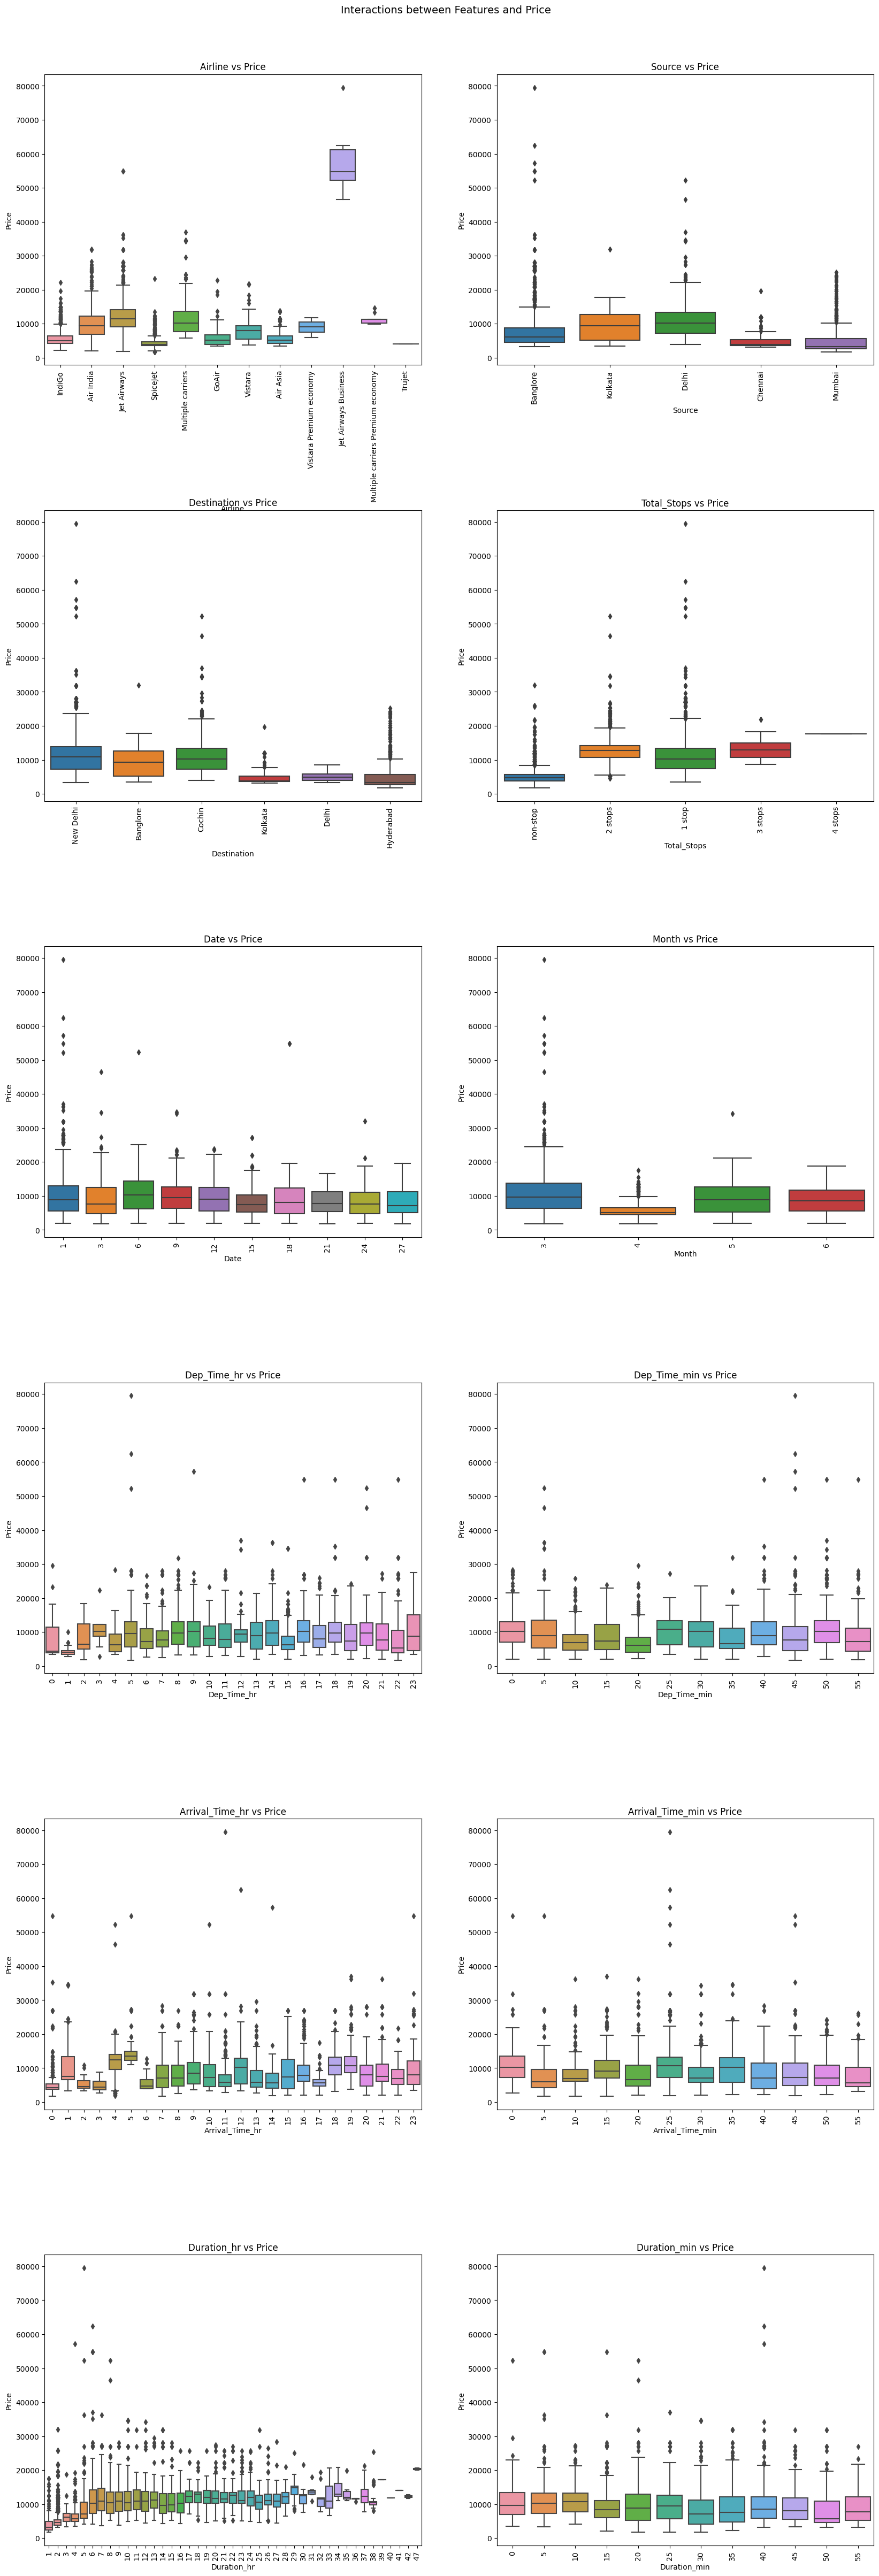

In [ ]:
cols=["Airline","Source","Destination","Total_Stops","Date","Month","Dep_Time_hr",
      "Dep_Time_min","Arrival_Time_hr","Arrival_Time_min","Duration_hr","Duration_min"]
fig,axes=plt.subplots(6,2,figsize=(20,60))
for i, col in enumerate(cols):
    sns.boxplot(x=col,y="Price", data=train, ax=axes[i//2,i%2])
    axes[i//2,i%2].set_xlabel(f"{col}")
    axes[i//2,i%2].set_ylabel("Price")
    axes[i//2,i%2].set_title(f"{col} vs Price")
    axes[i//2,i%2].tick_params(axis='x', rotation=90)
fig.text(0.5,0.9,"Interactions between Features and Price", va="center", ha="center", fontsize=14)
plt.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
train=pd.get_dummies(train,columns=['Source','Destination','Airline'],drop_first=True,dtype=int)
print(f"One hot encoding:{['Source','Destination','Airline']}.")
train['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops': 2,'3 stops':3,'4 stops':4},inplace=True)
display(train)

One hot encoding:['Source', 'Destination', 'Airline'].


,Total_Stops,Price,Date,Month,Year,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hr,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,3897,24,3,2019,22,20,1,10,2,...,0,1,0,0,0,0,0,0,0,0
1,2,7662,1,5,2019,5,50,13,15,7,...,0,0,0,0,0,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,19,...,0,0,1,0,0,0,0,0,0,0
3,1,6218,12,5,2019,18,5,23,30,5,...,0,1,0,0,0,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,4,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,2019,19,55,22,25,2,...,0,0,0,0,0,0,0,0,0,0
10679,0,4145,27,4,2019,20,45,23,20,2,...,0,0,0,0,0,0,0,0,0,0
10680,0,7229,27,4,2019,8,20,11,20,3,...,0,0,1,0,0,0,0,0,0,0
10681,0,12648,1,3,2019,11,30,14,10,2,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
print("Dropping the year column:")
train.drop(columns="Year",axis=1, inplace=True)
display(train)

Dropping the year column:


,Total_Stops,Price,Date,Month,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hr,Duration_min,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,3897,24,3,22,20,1,10,2,50,...,0,1,0,0,0,0,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,0,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,1,0,0,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,...,0,0,0,0,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,...,0,0,0,0,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,...,0,0,1,0,0,0,0,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,1,0


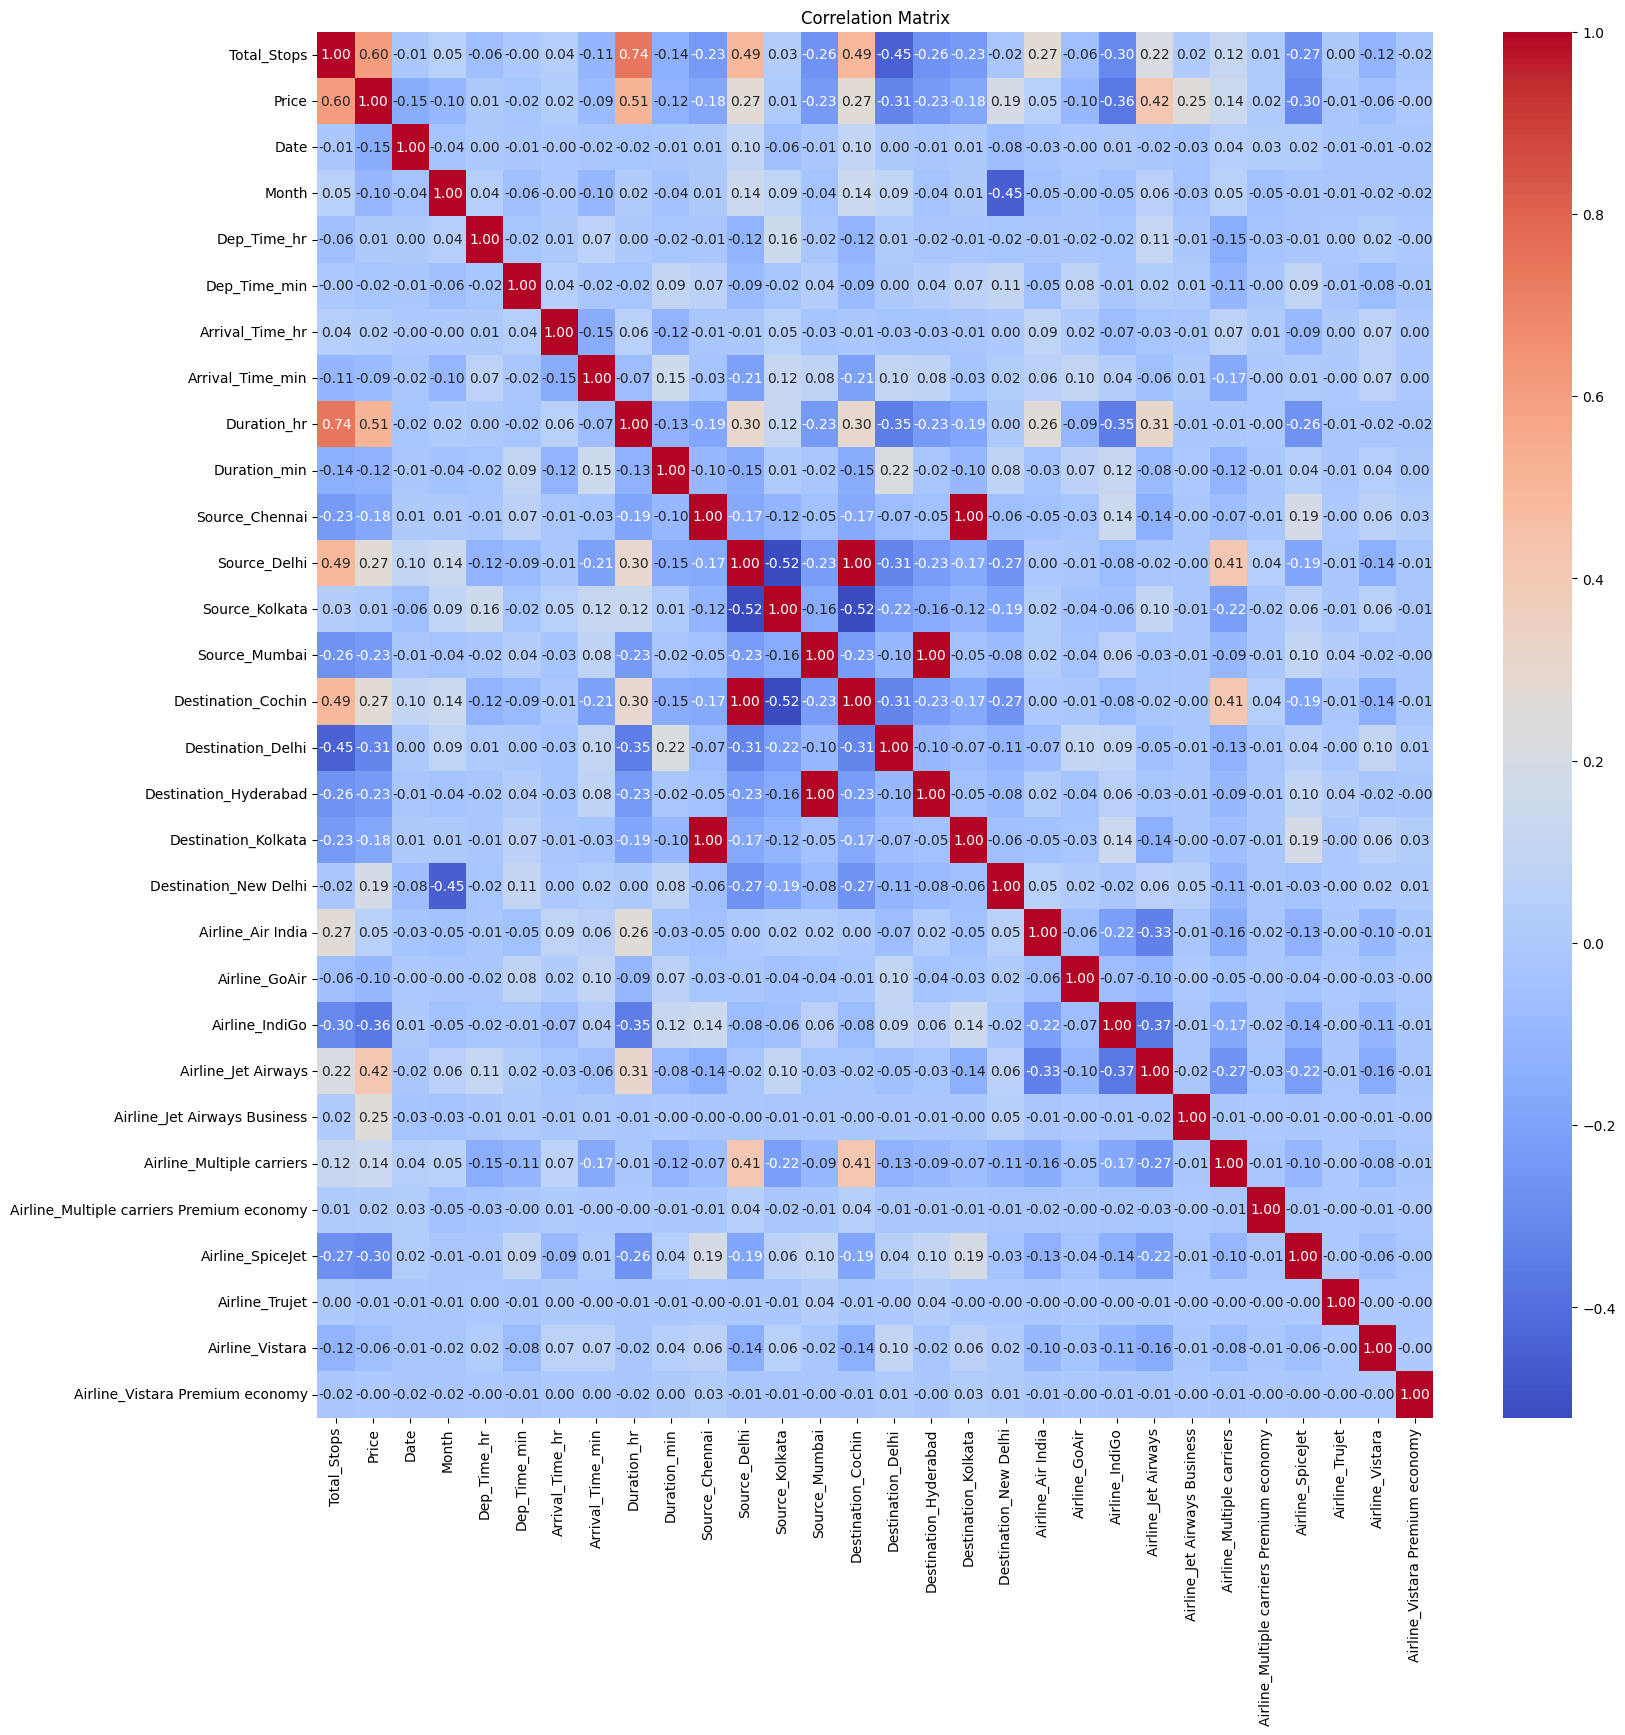

In [ ]:
plt.figure(figsize = (18,18))
sns.heatmap(train.corr(), annot = True,cmap="coolwarm", fmt="0.2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
y=train.loc[:,'Price']
x=train.drop('Price',axis=1)
print("Input Variables:")
display(x)
print()
print("Output Variable:")
display(y)

Input Variables:


,Total_Stops,Date,Month,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hr,Duration_min,Source_Chennai,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,24,3,22,20,1,10,2,50,0,...,0,1,0,0,0,0,0,0,0,0
1,2,1,5,5,50,13,15,7,25,0,...,0,0,0,0,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,1,0,0,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,2,30,0,...,0,0,0,0,0,0,0,0,0,0
10679,0,27,4,20,45,23,20,2,35,0,...,0,0,0,0,0,0,0,0,0,0
10680,0,27,4,8,20,11,20,3,0,0,...,0,0,1,0,0,0,0,0,0,0
10681,0,1,3,11,30,14,10,2,40,0,...,0,0,0,0,0,0,0,0,1,0



Output Variable:


0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10681, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print("Training Set:")
print("Input:")
display(x_train)
print()
print("Output:")
display(x_test)
print("\n")
print("Validation Set:")
print("Input:")
display(x_test)
print()
print("Output:")
display(y_test)

Training Set:
Input:


,Total_Stops,Date,Month,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hr,Duration_min,Source_Chennai,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
6076,1,18,5,5,45,18,15,12,30,0,...,0,0,1,0,0,0,0,0,0,0
2373,1,27,5,15,0,1,30,10,30,0,...,0,0,0,0,1,0,0,0,0,0
2442,1,9,5,22,40,10,40,12,0,0,...,0,0,0,0,0,0,0,0,0,0
9823,1,9,5,6,20,10,20,4,0,0,...,0,1,0,0,0,0,0,0,0,0
8991,0,6,6,7,10,10,10,3,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1,27,3,9,0,4,25,19,25,0,...,0,0,1,0,0,0,0,0,0,0
5191,1,9,5,14,5,20,45,6,40,0,...,0,0,1,0,0,0,0,0,0,0
5390,1,15,5,12,50,1,30,12,40,0,...,0,0,0,0,1,0,0,0,0,0
860,0,3,3,0,40,3,25,2,45,0,...,0,1,0,0,0,0,0,0,0,0



Output:


,Total_Stops,Date,Month,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hr,Duration_min,Source_Chennai,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
4830,1,24,3,15,10,19,50,4,40,0,...,0,1,0,0,0,0,0,0,0,0
3771,1,1,4,7,10,18,50,11,40,0,...,0,0,0,0,0,0,0,0,1,0
1523,1,27,3,19,15,19,45,24,30,0,...,0,0,1,0,0,0,0,0,0,0
3393,1,21,5,8,0,19,0,11,0,0,...,0,0,1,0,0,0,0,0,0,0
4169,0,12,6,7,10,10,10,3,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5273,0,12,4,23,55,2,45,2,50,0,...,0,0,0,0,0,0,0,0,0,0
2689,0,12,5,14,25,17,40,3,15,0,...,0,1,0,0,0,0,0,0,0,0
5491,1,24,5,17,0,23,35,6,35,0,...,0,0,1,0,0,0,0,0,0,0
7795,2,9,5,9,40,19,0,9,20,0,...,0,0,1,0,0,0,0,0,0,0




Validation Set:
Input:


,Total_Stops,Date,Month,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hr,Duration_min,Source_Chennai,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
4830,1,24,3,15,10,19,50,4,40,0,...,0,1,0,0,0,0,0,0,0,0
3771,1,1,4,7,10,18,50,11,40,0,...,0,0,0,0,0,0,0,0,1,0
1523,1,27,3,19,15,19,45,24,30,0,...,0,0,1,0,0,0,0,0,0,0
3393,1,21,5,8,0,19,0,11,0,0,...,0,0,1,0,0,0,0,0,0,0
4169,0,12,6,7,10,10,10,3,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5273,0,12,4,23,55,2,45,2,50,0,...,0,0,0,0,0,0,0,0,0,0
2689,0,12,5,14,25,17,40,3,15,0,...,0,1,0,0,0,0,0,0,0,0
5491,1,24,5,17,0,23,35,6,35,0,...,0,0,1,0,0,0,0,0,0,0
7795,2,9,5,9,40,19,0,9,20,0,...,0,0,1,0,0,0,0,0,0,0



Output:


4830     7476
3771     7927
1523     5963
3393    16289
4169     8016
        ...  
5273     7080
2689     5000
5491    14151
7795    13029
749      8040
Name: Price, Length: 3205, dtype: int64

In [ ]:
models=[LinearRegression(), Lasso(), SVR(), KNeighborsRegressor(),
       DecisionTreeRegressor(),XGBRegressor(), RandomForestRegressor(), ExtraTreesRegressor()]
r2_scores=[]
print("Training by different models:")
print()
for model in models:
    print(f"Model Used: {model}")
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    r2=round(r2_score(y_test, y_pred),4)
    print(f"Accuracy Acquired: {r2}.")
    r2_scores.append(r2)
    print()

max_r2=max(r2_scores)
print(f"Best R2 Score Recorded: {max_r2}.")
max_idx=r2_scores.index(max_r2)
best_model=models[max_idx]
print()
print(f"Best Model Perfomance: {best_model}.")

Training by different models:

Model Used: LinearRegression()
Accuracy Acquired: 0.6468.

Model Used: Lasso()
Accuracy Acquired: 0.6459.

Model Used: SVR()
Accuracy Acquired: 0.0095.

Model Used: KNeighborsRegressor()
Accuracy Acquired: 0.5778.

Model Used: DecisionTreeRegressor()
Accuracy Acquired: 0.715.

Model Used: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs

In [ ]:
print("Hyper-parameter tuning for best model:")
params = {'max_depth': [1, 2, 3, 4, 5],
          'learning_rate': [0.01, 0.05, 0.1],
          'n_estimators': [100, 200, 300, 400, 500],
          'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
print(f"Parameters tested on:\n{params}.\n")
xgb = XGBRegressor()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print(f"K Fold parameters used:\n1. N Splits {kf.n_splits}.\n2. Random State: {kf.random_state}.\n")

random_search = RandomizedSearchCV(
    xgb, param_distributions=params, n_iter=20, cv=kf, scoring='r2', random_state=42, verbose=0,n_jobs=-1
)

random_search.fit(x_train, y_train)
best_params=random_search.best_params_
best_score=random_search.best_score_

print("Best Parameters: ", best_params)
print("Best R2 Score: ", best_score)

Hyper-parameter tuning for best model:
Parameters tested on:
{'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}.

K Fold parameters used:
1. N Splits 5.
2. Random State: 42.

Best Parameters:  {'reg_lambda': 1.0, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.1}
Best R2 Score:  0.8024453186404517


In [ ]:
best_params =  {'reg_lambda': 1.0, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.1}

best_xgb = XGBRegressor(**best_params, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_xgb, x_train, y_train, cv=kf, scoring='r2')

mae_scores = cross_val_score(best_xgb, x_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
mean_mae = -np.mean(mae_scores)
mean_mae=round(mean_mae,2)

mse_scores = cross_val_score(best_xgb, x_train, y_train, cv=kf, scoring='neg_mean_squared_error')
mean_mse = -np.mean(mse_scores)
mean_mse = round(mean_mse,2)

mean_r2 = np.mean(cv_scores)
mean_r2=round(mean_r2,4)

print(f"XGBoost Regressor with Best Parameters: {best_xgb}.")
print()
print(f"Mean R2 Score in K-fold: {mean_r2}.")
print()
print(f"Mean Absolute Error in K-fold: {mean_mae}.")
print()
print(f"Mean Square Error in K-fold: {mean_mse}.")
print()

XGBoost Regressor with Best Parameters: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...).

Mean R2 Score in K-fold: 0.8024.

Mean Absolute Error in K-fold: 1322.94.

Mean Square Error in K-fold: 4241015.08.



In [ ]:
print("Fitting the best model:")
best_xgb.fit(x_train,y_train)
y_pred=best_xgb.predict(x_test)

r2_fit=round(r2_score(y_test,y_pred),4)
print(f"Final R2 Score: {r2_fit}.")

Fitting the best model:
Final R2 Score: 0.8563.


In [ ]:
print("Model saved.")
joblib.dump(best_xgb,"Best_XGB.joblib")

Model saved.


['Best_XGB.joblib']

## Predictive Model

In [ ]:
model_paths=["/content/Best_XGB.joblib","/content/Best_XGB.joblib"]
for path in model_paths:
    if os.path.exists(path):
        model_path=path
print(f"Model to be extracted from {model_path}.")

In [ ]:
loaded_model=joblib.load(model_path)
print("Extracted Model:")
display(loaded_model)

Extracted Model:


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
test=pd.read_excel('/content/Test_set.xlsx')
print("Testing Dataset:")
display(test)

Testing Dataset:


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [ ]:
print("Test DF Information:")
print(test.info())

Test DF Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


In [ ]:
print("Null Counts in Test DF:")
display(test.isnull().sum())

Null Counts in Test DF:


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [ ]:
print("Test dataset description:")
print("Numerical columns:")
display(test.describe())
print()
print("Categorical columns:")
display(test.describe(include="object"))

Test dataset description:
Numerical columns:


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148



Categorical columns:


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [ ]:
test['Date']=pd.to_numeric(test['Date_of_Journey'].str.split('/').str[0])
test['Month']=pd.to_numeric(test['Date_of_Journey'].str.split('/').str[1])
test['Year']=pd.to_numeric(test['Date_of_Journey'].str.split('/').str[2])
print("Separating date, month & year from date column in test:")
display(test[['Date','Month','Year']])

Separating date, month & year from date column in test:


,Date,Month,Year
0,6,6,2019
1,12,5,2019
2,21,5,2019
3,21,5,2019
4,24,6,2019
...,...,...,...
2666,6,6,2019
2667,27,3,2019
2668,6,3,2019
2669,6,3,2019


In [ ]:
cols_to_drop=["Date_of_Journey","Route","Additional_Info"]
print(f"Dropping columns in test: {cols_to_drop}:")
test.drop(columns=cols_to_drop, axis=1, inplace=True)
display(test)

Dropping columns in test: ['Date_of_Journey', 'Route', 'Additional_Info']:


,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Date,Month,Year
0,Jet Airways,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop,6,6,2019
1,IndiGo,Kolkata,Banglore,06:20,10:20,4h,1 stop,12,5,2019
2,Jet Airways,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1 stop,21,5,2019
3,Multiple carriers,Delhi,Cochin,08:00,21:00,13h,1 stop,21,5,2019
4,Air Asia,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,non-stop,24,6,2019
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,20:30,20:25 07 Jun,23h 55m,1 stop,6,6,2019
2667,IndiGo,Kolkata,Banglore,14:20,16:55,2h 35m,non-stop,27,3,2019
2668,Jet Airways,Delhi,Cochin,21:50,04:25 07 Mar,6h 35m,1 stop,6,3,2019
2669,Air India,Delhi,Cochin,04:00,19:15,15h 15m,1 stop,6,3,2019


In [ ]:
test['Dep_Time_hr']=pd.to_numeric(test['Dep_Time'].str.split(':').str[0])
test['Dep_Time_min']=pd.to_numeric(test['Dep_Time'].str.split(':').str[1])
print("Separating hours and minutes in departure time in test:")
display(test[['Dep_Time_hr','Dep_Time_min']])

Separating hours and minutes in departure time in test:


,Dep_Time_hr,Dep_Time_min
0,17,30
1,6,20
2,19,15
3,8,0
4,23,55
...,...,...
2666,20,30
2667,14,20
2668,21,50
2669,4,0


In [ ]:
test['Duration_hr']=test['Duration'].str.split().str[0].str.split('h').str[0]
print("Converting duration time to hours in test:")
display(test['Duration_hr'])

Converting duration time to hours in test:


0       10
1        4
2       23
3       13
4        2
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Duration_hr, Length: 2671, dtype: object

In [ ]:
test.drop(test[test['Duration_hr']=='5m'].index,axis=0,inplace=True)
print("Removing the row with duration of 5 minutes in test:")
test['Duration_hr']=pd.to_numeric(test['Duration_hr'])
display(test['Duration_hr'])

Removing the row with duration of 5 minutes in test:


0       10
1        4
2       23
3       13
4        2
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Duration_hr, Length: 2670, dtype: int64

In [ ]:
test['Duration_min']=test['Duration'].str.split().str[1].str.split('m').str[0]
test['Duration_min'].fillna(0,inplace=True)
test["Duration_min"]=pd.to_numeric(test["Duration_min"])
print("Separating minutes from Duration in test:")
display(test['Duration_min'])

Separating minutes from Duration in test:


0       55
1        0
2       45
3        0
4       50
        ..
2666    55
2667    35
2668    35
2669    15
2670    20
Name: Duration_min, Length: 2670, dtype: int64

In [ ]:
test['Arrival_Time_hr']=pd.to_numeric(test['Arrival_Time'].str.split(':').str[0])
test['Arrival_Time_min']=test['Arrival_Time'].str.split(':').str[1]
test['Arrival_Time_min']=test['Arrival_Time_min'].str.split().str[0]
test["Arrival_Time_min"]=pd.to_numeric(test["Arrival_Time_min"])
print("Separating hours from Arrival Time and converting into numeric:")
display(test['Arrival_Time_min'])

Separating hours from Arrival Time and converting into numeric:


0       25
1       20
2        0
3        0
4       45
        ..
2666    25
2667    55
2668    25
2669    15
2670    15
Name: Arrival_Time_min, Length: 2670, dtype: int64

In [ ]:
cols_to_drop=['Dep_Time','Arrival_Time','Duration']
print(f"Dropping the columns in test: {cols_to_drop}.")
test.drop(columns=cols_to_drop,axis=1,inplace=True)
display(test)

Dropping the columns in test: ['Dep_Time', 'Arrival_Time', 'Duration'].


,Airline,Source,Destination,Total_Stops,Date,Month,Year,Dep_Time_hr,Dep_Time_min,Duration_hr,Duration_min,Arrival_Time_hr,Arrival_Time_min
0,Jet Airways,Delhi,Cochin,1 stop,6,6,2019,17,30,10,55,4,25
1,IndiGo,Kolkata,Banglore,1 stop,12,5,2019,6,20,4,0,10,20
2,Jet Airways,Delhi,Cochin,1 stop,21,5,2019,19,15,23,45,19,0
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,2019,8,0,13,0,21,0
4,Air Asia,Banglore,Delhi,non-stop,24,6,2019,23,55,2,50,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1 stop,6,6,2019,20,30,23,55,20,25
2667,IndiGo,Kolkata,Banglore,non-stop,27,3,2019,14,20,2,35,16,55
2668,Jet Airways,Delhi,Cochin,1 stop,6,3,2019,21,50,6,35,4,25
2669,Air India,Delhi,Cochin,1 stop,6,3,2019,4,0,15,15,19,15


In [ ]:
test=pd.get_dummies(test,columns=['Source','Destination','Airline'],drop_first=True,dtype=int)
print(f"One hot encoding:{['Source','Destination','Airline']} in test.")
test['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops': 2,'3 stops':3,'4 stops':4},inplace=True)
display(test)

One hot encoding:['Source', 'Destination', 'Airline'] in test.


,Total_Stops,Date,Month,Year,Dep_Time_hr,Dep_Time_min,Duration_hr,Duration_min,Arrival_Time_hr,Arrival_Time_min,...,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,1,6,6,2019,17,30,10,55,4,25,...,0,0,0,1,0,0,0,0,0,0
1,1,12,5,2019,6,20,4,0,10,20,...,0,0,1,0,0,0,0,0,0,0
2,1,21,5,2019,19,15,23,45,19,0,...,0,0,0,1,0,0,0,0,0,0
3,1,21,5,2019,8,0,13,0,21,0,...,0,0,0,0,0,1,0,0,0,0
4,0,24,6,2019,23,55,2,50,2,45,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,2019,20,30,23,55,20,25,...,1,0,0,0,0,0,0,0,0,0
2667,0,27,3,2019,14,20,2,35,16,55,...,0,0,1,0,0,0,0,0,0,0
2668,1,6,3,2019,21,50,6,35,4,25,...,0,0,0,1,0,0,0,0,0,0
2669,1,6,3,2019,4,0,15,15,19,15,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
print("Dropping the year column in test:")
test.drop(columns="Year",axis=1, inplace=True)
display(test)

Dropping the year column in test:


,Total_Stops,Date,Month,Dep_Time_hr,Dep_Time_min,Duration_hr,Duration_min,Arrival_Time_hr,Arrival_Time_min,Source_Chennai,...,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,1,6,6,17,30,10,55,4,25,0,...,0,0,0,1,0,0,0,0,0,0
1,1,12,5,6,20,4,0,10,20,0,...,0,0,1,0,0,0,0,0,0,0
2,1,21,5,19,15,23,45,19,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,21,5,8,0,13,0,21,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,24,6,23,55,2,50,2,45,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,30,23,55,20,25,0,...,1,0,0,0,0,0,0,0,0,0
2667,0,27,3,14,20,2,35,16,55,0,...,0,0,1,0,0,0,0,0,0,0
2668,1,6,3,21,50,6,35,4,25,0,...,0,0,0,1,0,0,0,0,0,0
2669,1,6,3,4,0,15,15,19,15,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
def check_same_columns(x_test, test):
    return x_test.columns.equals(test.columns)

if check_same_columns(x_test, test):
    print('The columns in the two DataFrames are the same.')
else:
    print('The columns in the two DataFrames are not the same.')

The columns in the two DataFrames are not the same.


In [ ]:
def add_missing_columns(x_test, test):
    for col in x_test.columns:
        if col not in test.columns:
            print(f"{col} is missing.")
            test[col] = 0
    return test

test = add_missing_columns(x_test, test)
print("Adding the missing columns:")
print(test.columns)

Airline_Trujet is missing.
Adding the missing columns:
Index(['Total_Stops', 'Date', 'Month', 'Dep_Time_hr', 'Dep_Time_min',
       'Duration_hr', 'Duration_min', 'Arrival_Time_hr', 'Arrival_Time_min',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Airline_Trujet'],
      dtype='object')


In [ ]:
def rearrange_columns(x_test, test):
    return test.reindex(columns=x_test.columns)
test = rearrange_columns(x_test, test)
print("Test columns:")
print(test.columns)
print("Validation columns:")
print(x_test.columns)

Test columns:
Index(['Total_Stops', 'Date', 'Month', 'Dep_Time_hr', 'Dep_Time_min',
       'Arrival_Time_hr', 'Arrival_Time_min', 'Duration_hr', 'Duration_min',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')
Validation columns:
Index(['Total_Stops', 'Date', 'Month', 'Dep_Time_hr', 'Dep_Time_min',
       'Arrival_Time_hr', 'Arrival_Time_min', 'Duration_hr', 'Duration_min',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination

In [ ]:
print("Rechecking the arrangement:")
if check_same_columns(x_test, test):
    print('The columns in the two DataFrames are the same.')
else:
    print('The columns in the two DataFrames are not the same.')

Rechecking the arrangement:
The columns in the two DataFrames are the same.


In [ ]:
price_pred=loaded_model.predict(test)
print("Price Predicted:")
print(price_pred)

Price Predicted:
[12077.33    4366.3267 13241.69   ... 17380.06   12801.728   8338.264 ]


In [ ]:
test['price_pred'] = price_pred
print("Final Predictions dataframe:")
display(test)
test.to_csv("Final_Predictions.csv", index=False)
print("Dataframe saved to Final_Predictions.csv.")

Final Predictions dataframe:


,Total_Stops,Date,Month,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hr,Duration_min,Source_Chennai,...,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,price_pred
0,1,6,6,17,30,4,25,10,55,0,...,0,1,0,0,0,0,0,0,0,12077.330078
1,1,12,5,6,20,10,20,4,0,0,...,1,0,0,0,0,0,0,0,0,4366.326660
2,1,21,5,19,15,19,0,23,45,0,...,0,1,0,0,0,0,0,0,0,13241.690430
3,1,21,5,8,0,21,0,13,0,0,...,0,0,0,1,0,0,0,0,0,11031.541992
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,0,0,0,4119.450684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,30,20,25,23,55,0,...,0,0,0,0,0,0,0,0,0,9508.371094
2667,0,27,3,14,20,16,55,2,35,0,...,1,0,0,0,0,0,0,0,0,5042.303223
2668,1,6,3,21,50,4,25,6,35,0,...,0,1,0,0,0,0,0,0,0,17380.060547
2669,1,6,3,4,0,19,15,15,15,0,...,0,0,0,0,0,0,0,0,0,12801.727539


Dataframe saved to Final_Predictions.csv.
